In [414]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn.feature_selection import RFECV
from sklearn import linear_model

In [431]:
data = pd.read_csv('classdata.csv')
placed_data = data[data['status'] == 'Placed']

In [433]:
placed_data.head(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0


In [416]:
## Python Function to be used later

def make_dummies(df,col_dummies):
    new_df=df.copy()
    for col in col_dummies:
        dummies=pd.get_dummies(new_df[col], prefix='{}_'.format(col),drop_first=True)
        new_df=pd.concat([new_df,dummies], axis=1)
    return new_df

def ext_values(df, extreme_cols):
    new_df = df.copy()
    for col in extreme_cols:
        std = new_df[col].std()
        mean = new_df[col].mean()
        value = mean + (5*std)
        new_df[col] = new_df[col].apply(lambda x: value if (x > 5*std) else x)
    return new_df

<h1>Which student qualities affect salary the most?

<h3>Exploratory Data Analysis

>First, lets get a visual on salary and some of the continious data sources from our DataFrame.

[Text(0, 0.5, 'Salary'),
 Text(0.5, 0, 'Employment Test Score'),
 Text(0.5, 1.0, 'Salary by Employment Test')]

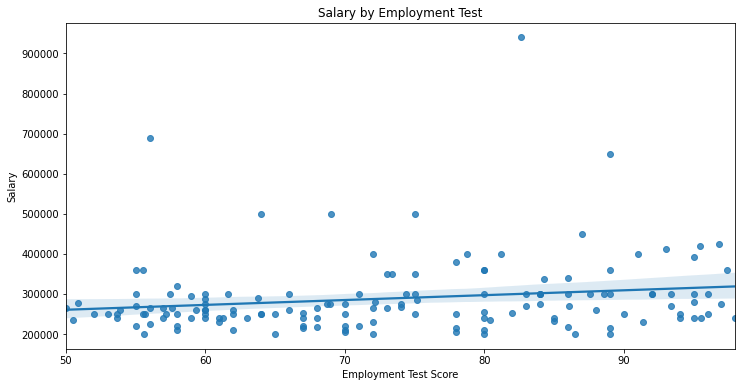

In [417]:
plt.figure(figsize=(12,6))
sns.regplot(x=placed_data['etest_p'], y=placed_data['salary']).set(title='Salary by Employment Test', xlabel='Employment Test Score', ylabel='Salary')

[Text(0, 0.5, 'Salary'),
 Text(0.5, 0, 'MBA Percentage'),
 Text(0.5, 1.0, 'Salary by MBA %')]

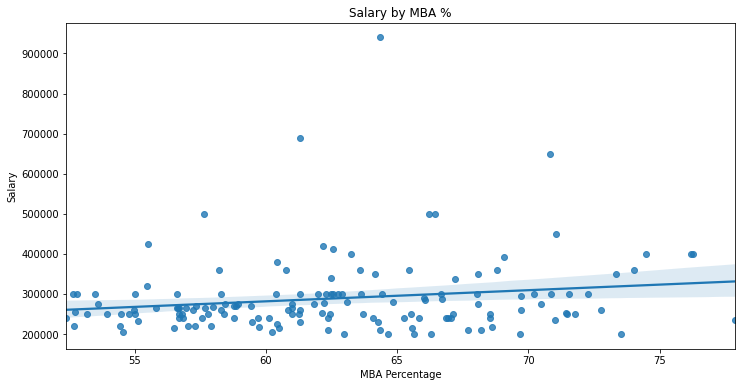

In [418]:
plt.figure(figsize=(12,6))
sns.regplot(x=placed_data['mba_p'], y=placed_data['salary']).set(title='Salary by MBA %', xlabel='MBA Percentage', ylabel='Salary')

> Looking at the graph above we can see that there is no real relationship between mba_p and salary. In addition to that, we can see that one person has a very large salary of 900000 rupees. Below is a histogram of salary. The large salary skews the data to the right.

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Salary'),
 Text(0.5, 1.0, 'Distribution of Salary')]

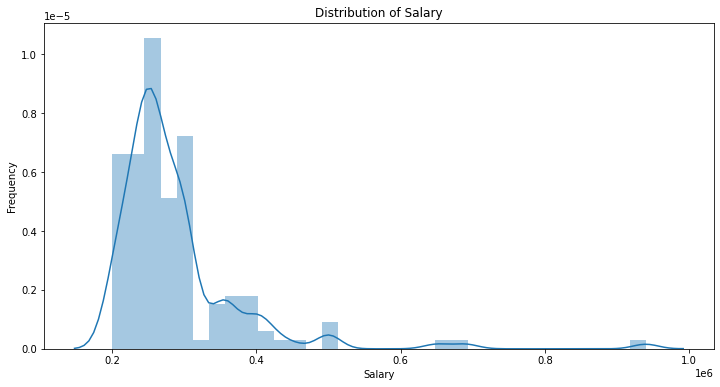

In [419]:
plt.figure(figsize=(12,6))
sns.distplot(placed_data['salary']).set(title='Distribution of Salary', xlabel='Salary', ylabel='Frequency')

In [420]:
## Seeing as how my data has one very large salary, I decided to remove that since it is much higher than all other salaries
# q = placed_data["salary"].quantile(0.99)
# placed_data = placed_data[placed_data["salary"] < q]

<h3>ANOVA Testing<h3>

In [421]:
## Keep
stats.f_oneway(placed_data['salary'][placed_data['workex'] == 'Yes'],
               placed_data['salary'][placed_data['workex'] == 'No'])

F_onewayResult(statistic=2.7893468172660345, pvalue=0.09703543621755742)

In [368]:
stats.f_oneway(placed_data['salary'][placed_data['gender']=='M'],
               placed_data['salary'][placed_data['gender']=='F'])

F_onewayResult(statistic=3.7824499302878496, pvalue=0.053714668806406095)

In [369]:
## Keep
stats.f_oneway(placed_data['salary'][placed_data['specialisation'] == 'Mkt&HR'],
               placed_data['salary'][placed_data['specialisation'] == 'Mkt&Fin'])

F_onewayResult(statistic=3.2056312122902, pvalue=0.07545741069325974)

In [370]:
## Drop This.
stats.f_oneway(placed_data['salary'][placed_data['hsc_s'] == 'Commerce'],
                placed_data['salary'][placed_data['hsc_s'] == 'Science'],
                placed_data['salary'][placed_data['hsc_s'] == 'Arts'])

F_onewayResult(statistic=0.6567251207686856, pvalue=0.520082117101212)

In [371]:
## Drop This
stats.f_oneway(placed_data['salary'][placed_data['ssc_b'] == 'Others'],
                placed_data['salary'][placed_data['ssc_b'] == 'Central'])

F_onewayResult(statistic=0.0044795333543091705, pvalue=0.9467295407875281)

In [372]:
## Drop This
stats.f_oneway(placed_data['salary'][placed_data['hsc_b'] == 'Others'],
                placed_data['salary'][placed_data['hsc_b'] == 'Central'])

F_onewayResult(statistic=0.00832142508589112, pvalue=0.9274413548272418)

In [334]:
## Drop This
stats.f_oneway(placed_data['salary'][placed_data['degree_t'] == 'Sci&Tech'],
               placed_data['salary'][placed_data['degree_t'] == 'Comm&Mgmt'],
               placed_data['salary'][placed_data['degree_t'] == 'Others'])

F_onewayResult(statistic=2.2241713568391965, pvalue=0.11183433736380005)

In [374]:
placed_data.head(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0


In [375]:
placed_data.drop(['ssc_b','degree_t','hsc_s','hsc_b','sl_no','status'], axis=1, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


[Text(0.5, 1.0, 'Correlation Map')]

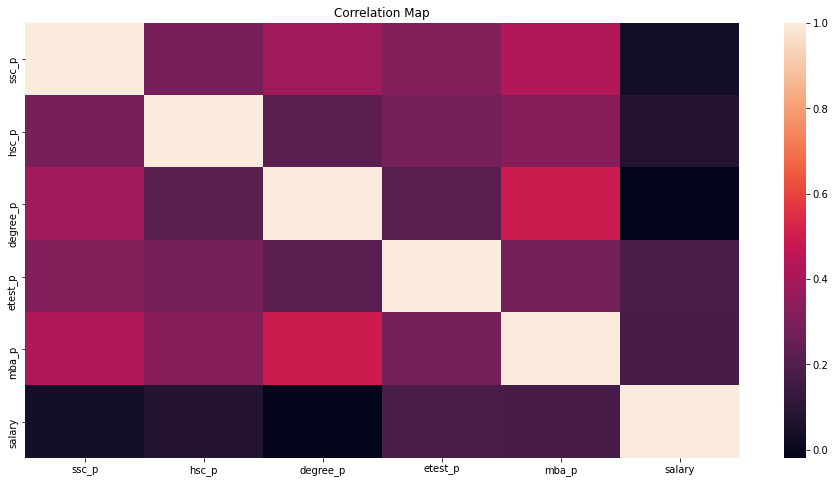

In [376]:
plt.figure(figsize=(16,8))
sns.heatmap(placed_data.corr()).set(title='Correlation Map')

In [377]:
placed_data.columns

Index(['gender', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'etest_p',
       'specialisation', 'mba_p', 'salary'],
      dtype='object')

In [378]:
l_reg = ols(formula='salary~degree_p+etest_p+mba_p', data=placed_data).fit()
l_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     3.433
Date:                Fri, 08 May 2020   Prob (F-statistic):             0.0187
Time:                        02:43:50   Log-Likelihood:                -1898.3
No. Observations:                 148   AIC:                             3805.
Df Residuals:                     144   BIC:                             3817.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.586e+05   9.35e+04      1.695      0.092   -2.63e+04    3.43e+05
degree_p   -2230.1196   1333.411     -1.672      0.097   -4865.706     405.467
etest_p     1041.1427    574.036      1.814      0.072     -93.482    2175.768
mba_p       3309.8105   1503.513      2.201      0.029     338.004    6281.617
==============================================================================
Omnibus:                      140.543   Durbin-Watson:                   2.178
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2233.071
Skew:                           3.430   Prob(JB):                         0.00
Kurtosis:                      20.750   Cond. No.                     1.48e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [379]:
placed_data = make_dummies(placed_data,['workex','specialisation','gender'])
placed_data.drop(['workex','specialisation','gender'], axis=1, inplace=True)

In [383]:
features_df = placed_data.drop('salary', axis=1)

In [384]:
poly = PolynomialFeatures(2)

In [385]:
output_array = poly.fit_transform(features_df)
test_df = pd.DataFrame(output_array)
names = poly.get_feature_names(features_df.columns)
test_df.columns = names

In [388]:
names = poly.get_feature_names(features_df.columns)

In [389]:
test_df.columns = names

In [390]:
test_df.drop('1', axis=1, inplace=True)

In [395]:
final_df = pd.merge(placed_data, test_df, how='outer')
final_df.drop('salary',axis=1,inplace=True)


In [396]:
col_lst = list(final_df.columns)

<h2>Model Testing<h2>

In [397]:
target = placed_data['salary']
features = final_df[col_lst]

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=22,test_size=0.2)

<h3>Linear Regression Model<h3>

In [398]:
lm = LinearRegression()
lm = lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


y_pred = lm.predict(X_test)
y_pred = y_pred
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)

print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 88555.50941219674
Training:  80450 vs. Testing:  88555


<h3>Lasso Test<h3>

In [399]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=22,test_size=0.2)

In [400]:
## Training Test

lasso = Lasso(alpha=0.01, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse))
print('Testing Error: '+ str(test_rmse))


Training Error: 52536.9078380469
Testing Error: 83108.82236216335


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 391280131727.614, tolerance: 120377708.47457628
  positive)


In [401]:
# Testing

lasso1 = Lasso(alpha=.1, normalize=False)

lasso1.fit(X_train,y_train)

y_train_lasso1 = lasso1.predict(X_train)
y_pred_lasso1 = lasso1.predict(X_test)

train_rmse_lasso1 = metrics.mean_absolute_error(y_train, y_train_lasso1)
test_rmse_lasso1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso1))
print('Training Error: '+ str(train_rmse_lasso1))
print('Testing Error: '+ str(test_rmse_lasso1))

Training Error: 52536.89176596616
Testing Error: 83107.18443819358


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 391293708256.60065, tolerance: 120377708.47457628
  positive)


<h3>Select K-Best<h3>

In [402]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=22,test_size=0.2)

In [403]:
selector = SelectKBest(f_regression, k=10)

selector.fit(X_train, y_train)

selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
X_train = X_train[selected_columns]
X_test = X_test[selected_columns]

In [404]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)

Training Root Mean Squared Error: 96442.89502066436
Testing Root Mean Squared Error: 50428.24272571626


In [405]:
print(list(selected_columns))

['etest_p', 'mba_p', 'hsc_p etest_p', 'etest_p^2', 'etest_p mba_p', 'etest_p workex__Yes', 'etest_p gender__M', 'mba_p^2', 'mba_p workex__Yes', 'mba_p gender__M']


<h3>Recursive Feature Elimination<h3>

In [406]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=22,test_size=0.2)

In [407]:
ols = linear_model.LinearRegression()
selector = RFECV(estimator=ols, step=1, cv=10, scoring='neg_mean_squared_error')

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)

selected_rfe = X_train.columns[selector.support_]

removed_rfe = X_train.columns[~selector.support_]

In [408]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

y_rfe = lm_rfe.predict(X_train[selected_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(X_test[selected_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)

Training Root Mean Squared Error: 100746.6449471335
Testing Root Mean Squared Error: 55336.64539042841


In [441]:
print('The average salary is ' + str(round(placed_data['salary'].mean(),2)))


The average salary is 288655.41
